In [111]:
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

We will read data from a .csv file stored on the computer using the **pandas** python library.

In [112]:
os.chdir(os.getcwd())
df = pd.read_csv("data/rolldata.csv", header=None, names=["10cm", "20cm", "30cm", "40cm", "47.825cm"])
df

10cm   20cm   30cm   40cm  47.825cm
0   1.231  1.972  2.522  2.673     3.323
1   1.298  1.945  2.503  2.719     3.299
2   1.305  1.970  2.545  2.769     3.310
3   1.289  1.836  2.550  2.907     3.313
4   1.273  2.023  2.557  2.968     3.302
5   1.474  2.013  2.764  2.990     3.302
6   1.251  1.946  2.539  2.895     3.304
7   1.431  1.943  2.514  2.896     3.310
8   1.293  1.956  2.509  2.950     3.311
9   1.157  2.019  2.509  2.912     3.298
10  1.312  1.924  2.536  2.887     3.288
11  1.226  1.982  2.522  2.918     3.304
12  1.285  2.028  2.485  2.973     3.294
13  1.329  2.026  2.538  3.232     3.292
14  1.313  2.047  2.507  2.874     3.293
15  1.291  2.067  2.479  2.939     3.295
16  1.365  1.902  2.465  2.954     3.279
17  1.318  1.926  2.485  2.922     3.295
18  1.279  1.919  2.466  2.941     3.273
19  1.265  1.974  2.461  3.110     3.268

**Finding the Acceleration** In order to find the acceleration at each distance we will create a duplicate table where each entry will be replaced by the calculated acceleration. We create a new table called **accTable**.

In [113]:
accTable = df
for i in range(len(df)): 
    t1 = df["10cm"][i]
    acc1 = (2 * 10) / pow(t1, 2)
    accTable["10cm"][i] = acc1
    
    t2 = df["20cm"][i]
    acc2 = (2 * 20) / pow(t2, 2)
    accTable["20cm"][i] = acc2
    
    t3 = df["30cm"][i]
    acc3 = (2 * 30) / pow(t3, 2)
    accTable["30cm"][i] = acc3
    
    t4 = df["40cm"][i]
    acc4 = (2 * 40) / pow(t4, 2)
    accTable["40cm"][i] = acc4
    
    t5 = df["47.825cm"][i]
    acc5 = (2 * 47.825) / pow(t5, 2)
    accTable["47.825cm"][i] = acc5
    
accTable

10cm       20cm      30cm       40cm  47.825cm
0   13.198175  10.285992  9.433244  11.196752  8.662122
1   11.870817  10.573549  9.577001  10.821104  8.788613
2   11.743809  10.306888  9.263512  10.433838  8.730296
3   12.037164  11.866281  9.227220   9.466729  8.714493
4   12.341649   9.773908  9.176769   9.081596  8.772651
5    9.205238   9.871257  7.853716   8.948446  8.772651
6   12.779545  10.562685  9.307346   9.545372  8.762033
7    9.766765  10.595328  9.493376   9.538781  8.730296
8   11.962803  10.454958  9.531251   9.192761  8.725024
9   14.940436   9.812674  9.531251   9.434247  8.793944
10  11.618828  10.805624  9.329379   9.598346  8.847516
11  13.306047  10.182459  9.433244   9.395490  8.762033
12  12.112220   9.725772  9.716245   9.051075  8.815314
13  11.323483   9.744984  9.314682   7.658563  8.826028
14  11.601137   9.546063  9.546465   9.685375  8.820669
15  11.999897   9.362224  9.763335   9.261702  8.809964
16  10.734077  11.057042  9.874552   9.167882  8.896151
17  11.513283  10.783194  9.716245   9.369784  8.809964
18  12.226127  10.862006  9.866545   9.249110  8.928797
19  12.498242  10.265159  9.906677   8.271213  8.956140

**Finding the mean** We will now create a new table using the **pandas** DataFrame object. This table will consist of the mean acceleration calculated at the set distance where the rolling time was measured. We calculate the mean using the numpy method **numpy.mean()**.

In [114]:
tbdata = {'Distance (cm)': ['10', '20', '30', '40', '47.825'], 'Mean Acceleration (cm/s/s)': np.mean(accTable)}
meanAccTable = pd.DataFrame(tbdata)
meanAccTable

Distance (cm)  Mean Acceleration (cm/s/s)
10cm                10                   11.938987
20cm                20                   10.321902
30cm                30                    9.443103
40cm                40                    9.418408
47.825cm        47.825                    8.796235

Along with the mean, another important metric that we need in order to understand our data set is the standard deviation. We compute the standard deviation and add the values to a new column in the table **meanAccTable** using the **numpy.std()** method.

In [115]:
meanAccTable["Standard Deviation"] = np.std(accTable, ddof=1)
meanAccTable

Distance (cm)  Mean Acceleration (cm/s/s)  Standard Deviation
10cm                10                   11.938987            1.219019
20cm                20                   10.321902            0.601567
30cm                30                    9.443103            0.435454
40cm                40                    9.418408            0.772901
47.825cm        47.825                    8.796235            0.072523

Finally, in order to determine the amount of significant figures to report our data, we need to know the error in our standard deviation. We will also change the indices of the table.

In [116]:
nmeasurements = 20 # the number of measurements taken 
stderr = np.std(accTable, ddof=1) / math.sqrt(nmeasurements)
meanAccTable["Standard Error"] = stderr
meanAccTable.index=[0,1,2,3,4]
meanAccTable


Distance (cm)  Mean Acceleration (cm/s/s)  Standard Deviation  \
0            10                   11.938987            1.219019   
1            20                   10.321902            0.601567   
2            30                    9.443103            0.435454   
3            40                    9.418408            0.772901   
4        47.825                    8.796235            0.072523   

   Standard Error  
0        0.272581  
1        0.134515  
2        0.097371  
3        0.172826  
4        0.016217

Now that all of the necessary values have been found, we will change the amount of sig. figs. shown on our table in accordance with the standard error and the amount of measurements taken. Since only 20 measurements have been taken, we will report our values to one significant figure. 

In [119]:
np_meanAccTableData = np.array(meanAccTable)
np_meanAccTableData[0,1:4] = np.round(np_meanAccTableData[0,1:4].astype(np.double), 1)
np_meanAccTableData[1,1:4] = np.round(np_meanAccTableData[1,1:4].astype(np.double), 1)
np_meanAccTableData[2,1:4] = np.round(np_meanAccTableData[2,1:4].astype(np.double), 1)
np_meanAccTableData[3,1:4] = np.round(np_meanAccTableData[3,1:4].astype(np.double), 1)
np_meanAccTableData[4,1:4] = np.round(np_meanAccTableData[4,1:4].astype(np.double), 2)
meanAccTable["Distance (cm)"] = np_meanAccTableData[:,0]
meanAccTable["Mean Acceleration (cm/s/s)"] = np_meanAccTableData[:,1]
meanAccTable["Standard Deviation"] = np_meanAccTableData[:,2]
meanAccTable["Standard Error"] = np_meanAccTableData[:,3]
meanAccTable

Distance (cm) Mean Acceleration (cm/s/s) Standard Deviation Standard Error
0            10                       11.9                1.2            0.3
1            20                       10.3                0.6            0.1
2            30                        9.4                0.4            0.1
3            40                        9.4                0.8            0.2
4        47.825                        8.8               0.07           0.02

We took the data stored in the pandas DataFrame object and placed it in an np.array() object. By doing so, we are able to acces the different rows of the multidimensional array object easily. Subsequently, we select the np.array() data by column and inset it into the respective row of the meanAccTable DataFrame object. 

**Plot** We now plot the mean acceleration for each set distance travelled by the rolling cylinder.

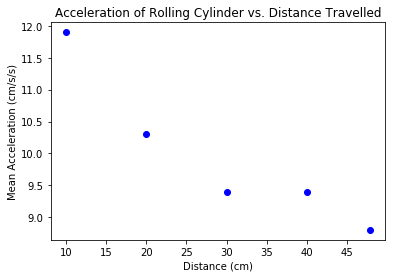

In [128]:
xdata = meanAccTable["Distance (cm)"]
ydata= meanAccTable["Mean Acceleration (cm/s/s)"]
accplot = plt.plot(xdata, ydata, 'bo')
plt.ylabel("Mean Acceleration (cm/s/s)")
plt.xlabel("Distance (cm)")
plt.title("Acceleration of Rolling Cylinder vs. Distance Travelled")
plt.show()